In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def execute_initGameConfig(name_exec, num_iter, rows, cols, pretty_print, filename):
    process = subprocess.Popen(
        ["../bin/" + name_exec],
        stdin=subprocess.PIPE,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        universal_newlines=True
    )
    input_data = f"{num_iter}\n{rows}\n{cols}\n{int(pretty_print)}\n{filename}"
    stdout, stderr = process.communicate(input=input_data)
    return stdout, stderr

def loop_benchmarks(name_exec, rows_cols=[32, 64, 128, 256, 512, 1024, 10240, 20480, 30720, 40960]):
    num_iters = [100, 1000]

    data = []
    pretty_print = False
    filename = "RANDOM"

    for num_iter in num_iters:
        for row_col in rows_cols:
            print(f"Executing {name_exec} with {num_iter} iterations and {row_col} rows/cols")
            stdout, stderr = execute_initGameConfig(name_exec, num_iter, row_col, row_col, pretty_print, filename)
            salida = stdout.split()[-1].strip()
            data.append([name_exec, num_iter, row_col, row_col, salida])
    
    return pd.DataFrame(data, columns=['type', 'num_iter', 'row', 'col', 'time'])

In [9]:
def execute_initGameConfig_threads(name_exec, num_iter, rows, cols, pretty_print, filename, threads):
    process = subprocess.Popen(
        ["../bin/" + name_exec],
        stdin=subprocess.PIPE,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        universal_newlines=True
    )
    input_data = f"{num_iter}\n{rows}\n{cols}\n{int(pretty_print)}\n{filename}\n{threads}"
    stdout, stderr = process.communicate(input=input_data)
    return stdout, stderr


def loop_benchmarks_threads(name_exec, rows_cols=[32, 64, 128, 256, 512, 1024, 10240, 20480, 30720, 40960], num_threads=[32, 128, 512, 2048, 4096]):
    num_iters = [1000]

    data = []
    pretty_print = False
    filename = "RANDOM"

    for threads in num_threads:
        for num_iter in num_iters:
            for row_col in rows_cols:
                print(f"Executing {name_exec} with {num_iter} iterations and {row_col} rows/cols")
                stdout, stderr = execute_initGameConfig_threads(name_exec, num_iter, row_col, row_col, pretty_print, filename, threads)
                salida = stdout.split()[-1].strip()
                data.append([name_exec, num_iter, row_col, row_col, threads, salida])
    
    return pd.DataFrame(data, columns=['type', 'num_iter', 'row', 'col', 'threads', 'time'])

In [ ]:
cuda = loop_benchmarks("gof_cuda")
cuda.to_csv("cuda.csv", index=False)

#sequential = loop_benchmarks("gof_sequential", True)

In [ ]:
opencl = loop_benchmarks("gof_opencl")
opencl.to_csv("opencl.csv", index=False)

In [ ]:
cpu = loop_benchmarks("gof_sequential")
cpu.to_csv("cpu.csv", index=False)

In [ ]:
cpu_linear = loop_benchmarks("gof_sequential", list(range(32, 2040, 32)))
cpu_linear.to_csv("cpu_linear.csv", index=False)

Speed up CPU vs GPU opencl

In [ ]:
opencl_linear = loop_benchmarks("gof_opencl", list(range(32, 2040, 32)))
opencl_linear.to_csv("opencl_linear.csv", index=False)

In [ ]:
cuda_linear = loop_benchmarks("gof_cuda", list(range(32, 2040, 32)))
cuda_linear.to_csv("cuda_linear.csv", index=False)

In [ ]:
# Calcular el Speedup para cada conjunto de datos
# Convertir los valores de tiempo a tipo numérico
cpu["time"] = pd.to_numeric(cpu["time"])
opencl["time"] = pd.to_numeric(opencl["time"])


In [ ]:
# Fusionar los DataFrames de CPU y GPU
df_merged = pd.merge(cpu, opencl[["num_iter", "row", "col", "time"]], on=["num_iter", "row", "col"], suffixes=["_cpu", "_gpu"])

# Calcular el Speedup para cada conjunto de datos
df_merged["speedup"] = df_merged["time_cpu"] / df_merged["time_gpu"]


In [ ]:
df_merged

In [2]:
# Cargar los archivos CSV
df_cpu = pd.read_csv('cpu_linear.csv')
df_opengl = pd.read_csv('opencl_linear.csv')
df_cuda = pd.read_csv('cuda_linear.csv')

In [3]:
df_cpu = df_cpu[df_cpu["num_iter"] == 1000]
df_opengl = df_opengl[df_opengl["num_iter"] == 1000]
df_cuda = df_cuda[df_cuda["num_iter"] == 1000]

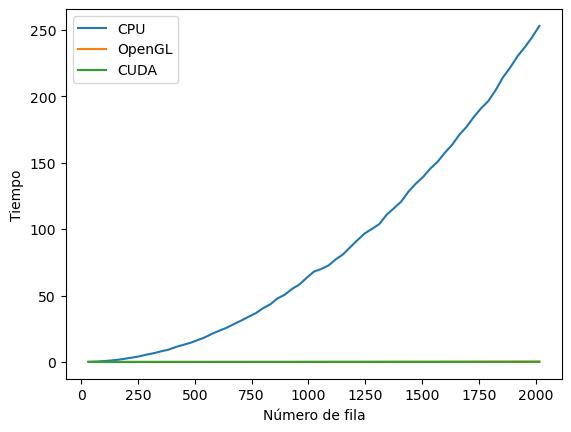

In [4]:
# Convertir las columnas a matrices NumPy
row = df_cpu['row'].to_numpy()

time_cpu = df_cpu['time'].to_numpy()
time_opengl = df_opengl['time'].to_numpy()
time_cuda = df_cuda['time'].to_numpy()

# Graficar los tiempos en base al número de fila
plt.plot(row, time_cpu, label='CPU')
plt.plot(row, time_opengl, label='OpenGL')
plt.plot(row, time_cuda, label='CUDA')

# Configurar el título y los ejes
plt.xlabel('Número de fila')
plt.ylabel('Tiempo')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

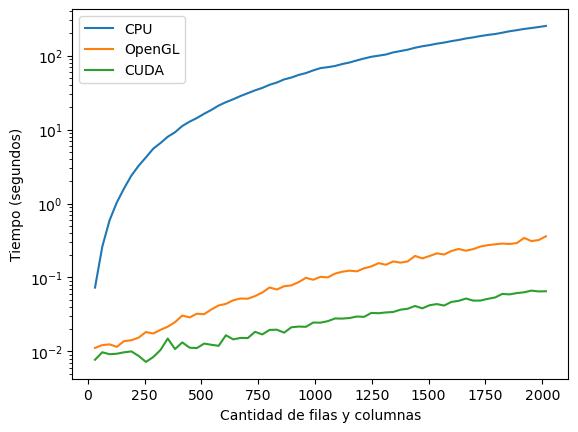

In [6]:
# Graficar los tiempos en base al número de fila
plt.plot(row, time_cpu, label='CPU')
plt.plot(row, time_opengl, label='OpenGL')
plt.plot(row, time_cuda, label='CUDA')

# Configurar el título y los ejes
plt.xlabel('Cantidad de filas y columnas') 
plt.ylabel('Tiempo (segundos)')

# Configurar escala logarítmica en el eje y
plt.yscale('log')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [10]:
opencl_linear_th = loop_benchmarks_threads("gof_opencl", [32, 64, 128, 256, 512, 1024, 10240, 20480, 30720, 40960], [32, 128, 256, 512, 1024])
opencl_linear_th.to_csv("opencl_linear_th.csv", index=False)

Executing gof_opencl with 1000 iterations and 32 rows/cols
Executing gof_opencl with 1000 iterations and 64 rows/cols
Executing gof_opencl with 1000 iterations and 128 rows/cols
Executing gof_opencl with 1000 iterations and 256 rows/cols
Executing gof_opencl with 1000 iterations and 512 rows/cols
Executing gof_opencl with 1000 iterations and 1024 rows/cols
Executing gof_opencl with 1000 iterations and 10240 rows/cols
Executing gof_opencl with 1000 iterations and 20480 rows/cols
Executing gof_opencl with 1000 iterations and 30720 rows/cols
Executing gof_opencl with 1000 iterations and 40960 rows/cols
Executing gof_opencl with 1000 iterations and 32 rows/cols
Executing gof_opencl with 1000 iterations and 64 rows/cols
Executing gof_opencl with 1000 iterations and 128 rows/cols
Executing gof_opencl with 1000 iterations and 256 rows/cols
Executing gof_opencl with 1000 iterations and 512 rows/cols
Executing gof_opencl with 1000 iterations and 1024 rows/cols
Executing gof_opencl with 1000 ite